In [1]:
import numpy as np
import pandas as pd 
import os
from keras.models import Sequential, load_model
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                          BatchNormalization, Input, Conv2D, GlobalAveragePooling2D,concatenate,Concatenate,multiply, LocallyConnected2D, Lambda)
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras import backend as K
import keras
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB7
import skimage.io
from skimage.transform import resize

from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy, categorical_crossentropy
#from keras.applications.resnet50 import preprocess_input
from keras.applications.densenet import DenseNet121,DenseNet169,preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score, cohen_kappa_score

import keras.callbacks as callbacks
from keras.callbacks import Callback
get_ipython().run_line_magic('config', 'InlineBackend.figure_format="svg"')
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.filterwarnings("ignore")
SIZE = 224
NUM_CLASSES = 2
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model



In [2]:
from sklearn.model_selection import train_test_split


In [4]:
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


def get_num_input():
    df = pd.read_csv('/DATA/akanksha_2021cs39/Ad.csv')
    df = df.drop(['filename'],axis=1)
    columns = list(df.columns)
    features = columns[:-1]
    cls_name = columns[-1]
    X = np.zeros((len(df), len(features)))
    Y = list()
    for i, row in df.iterrows():
        X[i] = row[features]                    
        Y.append(row[cls_name])

    return (X, Y)
X_num, Y = get_num_input()
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split( X_num, Y, test_size=0.2,random_state=42)

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
import numpy as np
from keras import regularizers
from keras.layers import Dropout 
def compile_model():
    num_input = Input(shape=(133,))        ## branch 2 with numerical input
    x1 = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(num_input)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    out_b = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    out_b = Dense(1, activation='sigmoid')(out_b)
    model = Model(num_input, out_b)
    adam = Adam(lr=0.001, decay=1e-5)
    print(model.summary())
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model

In [6]:
model = compile_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 133)]             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              137216    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0     

In [7]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
history=model.fit(X_audio_train, y_audio_train, batch_size=256, epochs=1000,
                            validation_data=(X_audio_test, y_audio_test), callbacks=[es])

Epoch 1/1000
67/67 [==============================] - 3s 22ms/step - loss: 14.1072 - accuracy: 0.8862 - val_loss: 8.8871 - val_accuracy: 0.9475
Epoch 2/1000
67/67 [==============================] - 1s 17ms/step - loss: 8.4064 - accuracy: 0.9138 - val_loss: 7.8010 - val_accuracy: 0.9475
Epoch 3/1000
67/67 [==============================] - 1s 17ms/step - loss: 7.2356 - accuracy: 0.9329 - val_loss: 6.7592 - val_accuracy: 0.9475
Epoch 4/1000
67/67 [==============================] - 1s 13ms/step - loss: 6.3677 - accuracy: 0.9415 - val_loss: 6.0430 - val_accuracy: 0.9475
Epoch 5/1000
67/67 [==============================] - 1s 13ms/step - loss: 5.6430 - accuracy: 0.9442 - val_loss: 5.4575 - val_accuracy: 0.9475
Epoch 6/1000
67/67 [==============================] - 1s 13ms/step - loss: 5.0194 - accuracy: 0.9454 - val_loss: 4.7684 - val_accuracy: 0.9475
Epoch 7/1000
67/67 [==============================] - 1s 13ms/step - loss: 4.4765 - accuracy: 0.9457 - val_loss: 4.2842 - val_accuracy: 0.947

Epoch 58/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2388 - accuracy: 0.9459 - val_loss: 0.2282 - val_accuracy: 0.9475
Epoch 59/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2356 - accuracy: 0.9459 - val_loss: 0.2264 - val_accuracy: 0.9475
Epoch 60/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2349 - accuracy: 0.9459 - val_loss: 0.2250 - val_accuracy: 0.9475
Epoch 61/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2315 - accuracy: 0.9459 - val_loss: 0.2226 - val_accuracy: 0.9475
Epoch 62/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2303 - accuracy: 0.9459 - val_loss: 0.2213 - val_accuracy: 0.9475
Epoch 63/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2297 - accuracy: 0.9459 - val_loss: 0.2206 - val_accuracy: 0.9475
Epoch 64/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2276 - accuracy: 0.9459 - val_loss: 0.2172 - val_accuracy:

Epoch 115/1000
67/67 [==============================] - 1s 17ms/step - loss: 0.2080 - accuracy: 0.9459 - val_loss: 0.2011 - val_accuracy: 0.9475
Epoch 116/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2084 - accuracy: 0.9459 - val_loss: 0.2014 - val_accuracy: 0.9475
Epoch 117/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2079 - accuracy: 0.9459 - val_loss: 0.2043 - val_accuracy: 0.9475
Epoch 118/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2092 - accuracy: 0.9459 - val_loss: 0.2019 - val_accuracy: 0.9475
Epoch 119/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2085 - accuracy: 0.9459 - val_loss: 0.2032 - val_accuracy: 0.9475
Epoch 120/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2073 - accuracy: 0.9459 - val_loss: 0.2016 - val_accuracy: 0.9475
Epoch 121/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2087 - accuracy: 0.9459 - val_loss: 0.2017 - val_ac

67/67 [==============================] - 1s 16ms/step - loss: 0.2051 - accuracy: 0.9459 - val_loss: 0.1983 - val_accuracy: 0.9475
Epoch 228/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2036 - accuracy: 0.9459 - val_loss: 0.2001 - val_accuracy: 0.9475
Epoch 229/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2040 - accuracy: 0.9459 - val_loss: 0.1978 - val_accuracy: 0.9475
Epoch 230/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2048 - accuracy: 0.9459 - val_loss: 0.1988 - val_accuracy: 0.9475
Epoch 231/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2050 - accuracy: 0.9459 - val_loss: 0.1985 - val_accuracy: 0.9475
Epoch 232/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2055 - accuracy: 0.9459 - val_loss: 0.1979 - val_accuracy: 0.9475
Epoch 233/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2046 - accuracy: 0.9459 - val_loss: 0.1986 - val_accuracy: 0.9475


67/67 [==============================] - 1s 15ms/step - loss: 0.2032 - accuracy: 0.9459 - val_loss: 0.1969 - val_accuracy: 0.9475
Epoch 340/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2034 - accuracy: 0.9459 - val_loss: 0.2015 - val_accuracy: 0.9475
Epoch 341/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2044 - accuracy: 0.9459 - val_loss: 0.2018 - val_accuracy: 0.9475
Epoch 342/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2052 - accuracy: 0.9459 - val_loss: 0.1988 - val_accuracy: 0.9475
Epoch 343/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2045 - accuracy: 0.9459 - val_loss: 0.2006 - val_accuracy: 0.9475
Epoch 344/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2036 - accuracy: 0.9459 - val_loss: 0.1971 - val_accuracy: 0.9475
Epoch 345/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2020 - accuracy: 0.9459 - val_loss: 0.1970 - val_accuracy: 0.9475


67/67 [==============================] - 1s 15ms/step - loss: 0.2018 - accuracy: 0.9459 - val_loss: 0.1990 - val_accuracy: 0.9475
Epoch 452/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2017 - accuracy: 0.9459 - val_loss: 0.1965 - val_accuracy: 0.9475
Epoch 453/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2042 - accuracy: 0.9459 - val_loss: 0.1960 - val_accuracy: 0.9475
Epoch 454/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2023 - accuracy: 0.9459 - val_loss: 0.1967 - val_accuracy: 0.9475
Epoch 455/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2018 - accuracy: 0.9459 - val_loss: 0.1960 - val_accuracy: 0.9475
Epoch 456/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2013 - accuracy: 0.9459 - val_loss: 0.1955 - val_accuracy: 0.9475
Epoch 457/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2017 - accuracy: 0.9459 - val_loss: 0.1971 - val_accuracy: 0.9475


67/67 [==============================] - 1s 15ms/step - loss: 0.2029 - accuracy: 0.9459 - val_loss: 0.1952 - val_accuracy: 0.9475
Epoch 564/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2009 - accuracy: 0.9459 - val_loss: 0.1961 - val_accuracy: 0.9475
Epoch 565/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2021 - accuracy: 0.9459 - val_loss: 0.1975 - val_accuracy: 0.9475
Epoch 566/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1952 - val_accuracy: 0.9475
Epoch 567/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2019 - accuracy: 0.9459 - val_loss: 0.1954 - val_accuracy: 0.9475
Epoch 568/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2007 - accuracy: 0.9459 - val_loss: 0.1982 - val_accuracy: 0.9475
Epoch 569/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1955 - val_accuracy: 0.9475


67/67 [==============================] - 1s 14ms/step - loss: 0.2019 - accuracy: 0.9459 - val_loss: 0.2038 - val_accuracy: 0.9475
Epoch 676/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2026 - accuracy: 0.9459 - val_loss: 0.1958 - val_accuracy: 0.9475
Epoch 677/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2006 - accuracy: 0.9459 - val_loss: 0.1941 - val_accuracy: 0.9475
Epoch 678/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2009 - accuracy: 0.9459 - val_loss: 0.1947 - val_accuracy: 0.9475
Epoch 679/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2005 - accuracy: 0.9459 - val_loss: 0.2071 - val_accuracy: 0.9475
Epoch 680/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2027 - accuracy: 0.9459 - val_loss: 0.1961 - val_accuracy: 0.9475
Epoch 681/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2008 - accuracy: 0.9459 - val_loss: 0.1990 - val_accuracy: 0.9475


67/67 [==============================] - 1s 15ms/step - loss: 0.2003 - accuracy: 0.9459 - val_loss: 0.1938 - val_accuracy: 0.9475
Epoch 788/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1940 - val_accuracy: 0.9475
Epoch 789/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.1999 - accuracy: 0.9459 - val_loss: 0.1934 - val_accuracy: 0.9475
Epoch 790/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2011 - accuracy: 0.9459 - val_loss: 0.1933 - val_accuracy: 0.9475
Epoch 791/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2012 - accuracy: 0.9459 - val_loss: 0.1934 - val_accuracy: 0.9475
Epoch 792/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1948 - val_accuracy: 0.9475
Epoch 793/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2004 - accuracy: 0.9459 - val_loss: 0.1992 - val_accuracy: 0.9475


67/67 [==============================] - 1s 16ms/step - loss: 0.2006 - accuracy: 0.9459 - val_loss: 0.1935 - val_accuracy: 0.9475
Epoch 900/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2021 - accuracy: 0.9459 - val_loss: 0.1941 - val_accuracy: 0.9475
Epoch 901/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.1992 - accuracy: 0.9459 - val_loss: 0.1944 - val_accuracy: 0.9475
Epoch 902/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2001 - accuracy: 0.9459 - val_loss: 0.1951 - val_accuracy: 0.9475
Epoch 903/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2016 - accuracy: 0.9459 - val_loss: 0.1943 - val_accuracy: 0.9475
Epoch 904/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1975 - val_accuracy: 0.9475
Epoch 905/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.1994 - accuracy: 0.9459 - val_loss: 0.1936 - val_accuracy: 0.9475


In [7]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="lower right")
    plt.show()

In [8]:
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

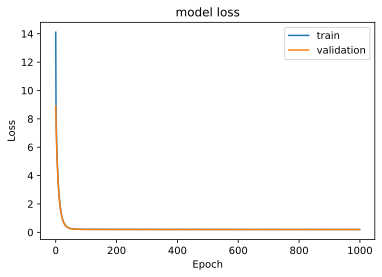

In [10]:
plot_loss(history)

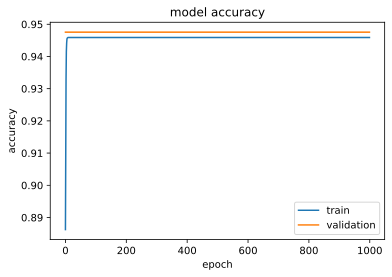

In [11]:
plot_hist(history)

In [12]:
# evaluate the model
train_loss, train_acc = model.evaluate(X_audio_train, y_audio_train, verbose=0)
test_loss, test_acc = model.evaluate(X_audio_test, y_audio_test, verbose=0)
print('Train_Loss: %.3f, Train_Acc: %.3f' % (train_loss, train_acc))
print('Test_Loss: %.3f, Test_Acc: %.3f' % (test_loss, test_acc))

Train_Loss: 0.194, Train_Acc: 0.946
Test_Loss: 0.194, Test_Acc: 0.948


In [13]:
pred = model.predict(X_audio_test)

In [14]:
y_pred = (model.predict(X_audio_test) > 0.5)*1

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
score = accuracy_score(y_audio_test, y_pred)
precision = precision_score(y_audio_test,y_pred)
recall = recall_score(y_audio_test,y_pred)
f1 = f1_score(y_audio_test,y_pred)
print("score:", score)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)

score: 0.9475417548812044
Precision: 0.0
Recall: 0.0
F1_score: 0.0


In [16]:
# confusion matrix
matrix = confusion_matrix(y_audio_test, y_pred, labels=[0,1])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[4028    0]
 [ 223    0]]


In [17]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_audio_test, y_pred, labels=[0,1])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4028
           1       0.00      0.00      0.00       223

    accuracy                           0.95      4251
   macro avg       0.47      0.50      0.49      4251
weighted avg       0.90      0.95      0.92      4251



In [18]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_audio_test, y_pred,labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 4028 0 223 0


In [3]:
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

def get_img_input():
    df = pd.read_csv('/DATA/akanksha_2021cs39/Vd.csv')
    columns = list(df.columns)
    features = columns[:-1]
    cls_name = columns[-1]
    X = np.zeros((len(df), len(features)))
    Y = list()
    for i, row in df.iterrows():
        X[i] = row[features]                    
        Y.append(row[cls_name])

    return (X, Y)
X_img, Y_img = get_img_input()
encoder = LabelEncoder()
Y_img = encoder.fit_transform(Y_img)
X_img_train, X_img_test, y_img_train, y_img_test = train_test_split( X_img, Y_img, test_size=0.3,random_state=42)

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
import numpy as np
from keras import regularizers
from keras.layers import Dropout 
def compile_model():
    img_input = Input(shape=(50176,)) 
    ## branch 1 with image input
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(img_input)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    out_a = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    out_a = Dense(1, activation='sigmoid')(out_a)
    model = Model(img_input, out_a)
    adam = Adam(lr=0.001, decay=1e-5)
    print(model.summary())
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model
    #x = MaxPooling2D((2, 2))(x)
    #x = Flatten()(x)
    #out_a = Dense(64)(x)

    

In [5]:
model = compile_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50176)]           0         
_________________________________________________________________
dense (Dense)                (None, 1024)              51381248  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0     

In [6]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
history=model.fit(X_img_train, y_img_train, batch_size=256, epochs=500,
                            validation_data=(X_img_test, y_img_test), callbacks=[es])

Epoch 1/500
59/59 [==============================] - 21s 327ms/step - loss: 267.8469 - accuracy: 0.9152 - val_loss: 52.1914 - val_accuracy: 0.9694
Epoch 2/500
59/59 [==============================] - 17s 286ms/step - loss: 74.4461 - accuracy: 0.9349 - val_loss: 36.9503 - val_accuracy: 0.9694
Epoch 3/500
59/59 [==============================] - 18s 308ms/step - loss: 49.7131 - accuracy: 0.9282 - val_loss: 32.5974 - val_accuracy: 0.9694
Epoch 4/500
59/59 [==============================] - 18s 298ms/step - loss: 38.5584 - accuracy: 0.9313 - val_loss: 28.9767 - val_accuracy: 0.9694
Epoch 5/500
59/59 [==============================] - 17s 285ms/step - loss: 32.0144 - accuracy: 0.9318 - val_loss: 26.0478 - val_accuracy: 0.9664
Epoch 6/500
59/59 [==============================] - 17s 292ms/step - loss: 27.3178 - accuracy: 0.9334 - val_loss: 23.6028 - val_accuracy: 0.9694
Epoch 7/500
59/59 [==============================] - 17s 292ms/step - loss: 23.7000 - accuracy: 0.9404 - val_loss: 21.9667 

59/59 [==============================] - 17s 286ms/step - loss: 4.7635 - accuracy: 0.9680 - val_loss: 4.6924 - val_accuracy: 0.9694
Epoch 58/500
59/59 [==============================] - 17s 287ms/step - loss: 4.6984 - accuracy: 0.9682 - val_loss: 4.6122 - val_accuracy: 0.9694
Epoch 59/500
59/59 [==============================] - 17s 284ms/step - loss: 4.6528 - accuracy: 0.9665 - val_loss: 4.6530 - val_accuracy: 0.9694
Epoch 60/500
59/59 [==============================] - 17s 286ms/step - loss: 4.6346 - accuracy: 0.9661 - val_loss: 4.5269 - val_accuracy: 0.9694
Epoch 61/500
59/59 [==============================] - 17s 286ms/step - loss: 4.4614 - accuracy: 0.9686 - val_loss: 4.3980 - val_accuracy: 0.9694
Epoch 62/500
59/59 [==============================] - 17s 291ms/step - loss: 4.3738 - accuracy: 0.9687 - val_loss: 4.3446 - val_accuracy: 0.9694
Epoch 63/500
59/59 [==============================] - 20s 346ms/step - loss: 4.3378 - accuracy: 0.9683 - val_loss: 4.3071 - val_accuracy: 0.969

59/59 [==============================] - 21s 355ms/step - loss: 1.6219 - accuracy: 0.9688 - val_loss: 1.5890 - val_accuracy: 0.9694
Epoch 114/500
59/59 [==============================] - 21s 352ms/step - loss: 1.5841 - accuracy: 0.9688 - val_loss: 1.5467 - val_accuracy: 0.9694
Epoch 115/500
59/59 [==============================] - 21s 351ms/step - loss: 1.5371 - accuracy: 0.9688 - val_loss: 1.5053 - val_accuracy: 0.9694
Epoch 116/500
59/59 [==============================] - 21s 352ms/step - loss: 1.4886 - accuracy: 0.9689 - val_loss: 1.4716 - val_accuracy: 0.9694
Epoch 117/500
59/59 [==============================] - 21s 351ms/step - loss: 1.4429 - accuracy: 0.9688 - val_loss: 1.4217 - val_accuracy: 0.9694
Epoch 118/500
59/59 [==============================] - 21s 356ms/step - loss: 1.4064 - accuracy: 0.9689 - val_loss: 1.3791 - val_accuracy: 0.9694
Epoch 119/500
59/59 [==============================] - 21s 353ms/step - loss: 1.3800 - accuracy: 0.9688 - val_loss: 1.3522 - val_accuracy:

59/59 [==============================] - 31s 527ms/step - loss: 0.2619 - accuracy: 0.9689 - val_loss: 0.2560 - val_accuracy: 0.9694
Epoch 170/500
59/59 [==============================] - 31s 522ms/step - loss: 0.2543 - accuracy: 0.9689 - val_loss: 0.2489 - val_accuracy: 0.9694
Epoch 171/500
59/59 [==============================] - 34s 587ms/step - loss: 0.2473 - accuracy: 0.9689 - val_loss: 0.2417 - val_accuracy: 0.9694
Epoch 172/500
59/59 [==============================] - 34s 574ms/step - loss: 0.2404 - accuracy: 0.9689 - val_loss: 0.2351 - val_accuracy: 0.9694
Epoch 173/500
59/59 [==============================] - 36s 613ms/step - loss: 0.2341 - accuracy: 0.9689 - val_loss: 0.2289 - val_accuracy: 0.9694
Epoch 174/500
59/59 [==============================] - 36s 615ms/step - loss: 0.2279 - accuracy: 0.9689 - val_loss: 0.2230 - val_accuracy: 0.9694
Epoch 175/500
59/59 [==============================] - 35s 590ms/step - loss: 0.2221 - accuracy: 0.9689 - val_loss: 0.2173 - val_accuracy:

59/59 [==============================] - 29s 493ms/step - loss: 0.1396 - accuracy: 0.9689 - val_loss: 0.1376 - val_accuracy: 0.9694
Epoch 226/500
59/59 [==============================] - 28s 482ms/step - loss: 0.1395 - accuracy: 0.9689 - val_loss: 0.1376 - val_accuracy: 0.9694
Epoch 227/500
59/59 [==============================] - 25s 430ms/step - loss: 0.1394 - accuracy: 0.9689 - val_loss: 0.1375 - val_accuracy: 0.9694
Epoch 228/500
59/59 [==============================] - 28s 482ms/step - loss: 0.1394 - accuracy: 0.9689 - val_loss: 0.1374 - val_accuracy: 0.9694
Epoch 229/500
59/59 [==============================] - 29s 495ms/step - loss: 0.1393 - accuracy: 0.9689 - val_loss: 0.1373 - val_accuracy: 0.9694
Epoch 230/500
59/59 [==============================] - 27s 456ms/step - loss: 0.1392 - accuracy: 0.9689 - val_loss: 0.1373 - val_accuracy: 0.9694
Epoch 231/500
59/59 [==============================] - 25s 424ms/step - loss: 0.1392 - accuracy: 0.9689 - val_loss: 0.1372 - val_accuracy:

59/59 [==============================] - 30s 509ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 282/500
59/59 [==============================] - 31s 519ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 283/500
59/59 [==============================] - 30s 505ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 284/500
59/59 [==============================] - 30s 512ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 285/500
59/59 [==============================] - 30s 517ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 286/500
59/59 [==============================] - 32s 540ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 287/500
59/59 [==============================] - 31s 520ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy:

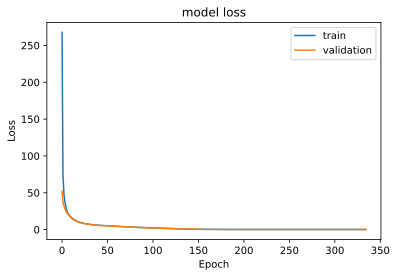

In [9]:
plot_loss(history)

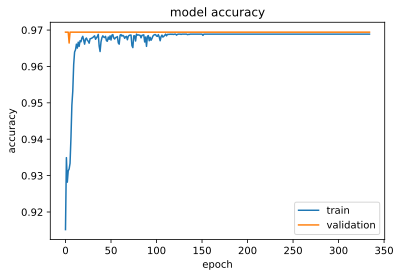

In [10]:
plot_hist(history)

In [12]:
# evaluate the model
train_loss, train_acc = model.evaluate(X_img_train, y_img_train, verbose=0)
test_loss, test_acc = model.evaluate(X_img_test, y_img_test, verbose=0)
print('Train_Loss: %.3f, Train_Acc: %.3f' % (train_loss, train_acc))
print('Test_Loss: %.3f, Test_Acc: %.3f' % (test_loss, test_acc))

Train_Loss: 0.139, Train_Acc: 0.969
Test_Loss: 0.137, Test_Acc: 0.969


In [13]:
pred = model.predict(X_img_test)

In [14]:
y_pred = (model.predict(X_img_test) > 0.5)*1

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("score:", score)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)

NameError: name 'y_test' is not defined

In [ ]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
print('Confusion matrix : \n',matrix)

In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred, labels=[0,1])
print('Classification report : \n',matrix)

In [ ]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test, y_pred,labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)